In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


In [2]:
tickers = ['SQ', 'MSFT', 'NVDA', 'GP']
myData = pd.DataFrame()
for t in tickers:
    myData[t] = wb.DataReader(t, data_source='yahoo', start='2019-11-21')['Adj Close']

In [3]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-11-21 to 2020-11-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SQ      253 non-null    float64
 1   MSFT    253 non-null    float64
 2   NVDA    253 non-null    float64
 3   GP      60 non-null     float64
dtypes: float64(4)
memory usage: 9.9 KB


In [4]:
myData.head()

,SQ,MSFT,NVDA,GP
Date,,,,
2019-11-21,67.419998,147.913040,209.740982,NaN
2019-11-22,67.750000,148.021912,210.449509,NaN
2019-11-25,68.250000,149.644714,220.747955,NaN
2019-11-26,68.940002,150.436340,216.546738,NaN
2019-11-27,69.650002,150.723297,217.944855,NaN


In [5]:
myData.tail()

,SQ,MSFT,NVDA,GP
Date,,,,
2020-11-16,179.160004,216.662766,540.609985,16.889999
2020-11-17,187.899994,213.900009,536.890015,16.570000
2020-11-18,185.539993,211.080002,537.150024,18.690001
2020-11-19,191.660004,212.419998,537.609985,18.950001
2020-11-20,195.970001,210.389999,523.510010,22.040001


### Normalization to 100:
\begin{align*}
\frac{{P}_t}{{P}_0} * 100
\end{align*}


In [6]:
myData.iloc[0]

SQ       67.419998
MSFT    147.913040
NVDA    209.740982
GP             NaN
Name: 2019-11-21 00:00:00, dtype: float64

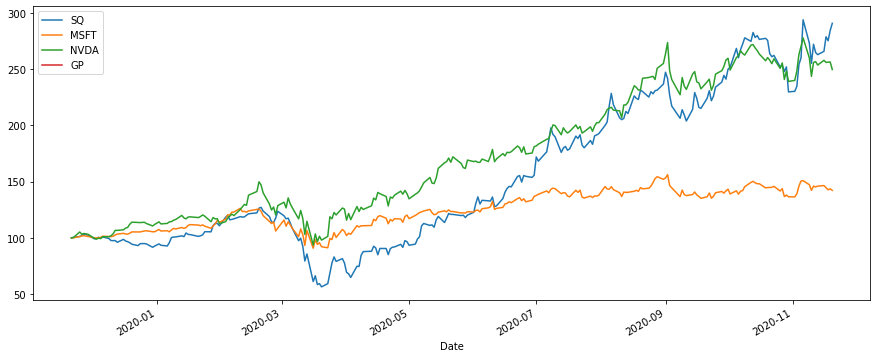

In [7]:
(myData / myData.iloc[0] * 100).plot(figsize = (15,6))

### Calculating the Return of a Portfolio of securities.

In [18]:
returns = (myData/myData.shift(1))-1
returns

,SQ,MSFT,NVDA,GP
Date,,,,
2019-11-21,NaN,NaN,NaN,NaN
2019-11-22,0.004895,0.000736,0.003378,NaN
2019-11-25,0.007380,0.010963,0.048935,NaN
2019-11-26,0.010110,0.005290,-0.019032,NaN
2019-11-27,0.010299,0.001907,0.006456,NaN
...,...,...,...,...
2020-11-16,0.011118,0.003326,0.016413,0.340476
2020-11-17,0.048783,-0.012751,-0.006881,-0.018946
2020-11-18,-0.012560,-0.013184,0.000484,0.127942


In [36]:
returns.tail()

,SQ,MSFT,NVDA,GP
Date,,,,
2020-11-16,0.011118,0.003326,0.016413,0.340476
2020-11-17,0.048783,-0.012751,-0.006881,-0.018946
2020-11-18,-0.012560,-0.013184,0.000484,0.127942
2020-11-19,0.032985,0.006348,0.000856,0.013911
2020-11-20,0.022488,-0.009557,-0.026227,0.163061


In [37]:
weights = np.array([0.40,0.2,0.15,0.25])

In [38]:
check = np.dot(returns,weights )

In [39]:
annual_returns = returns.mean() * 250
annual_returns

SQ      1.325213
MSFT    0.444845
NVDA    1.077350
GP      1.046955
dtype: float64

In [31]:
np.dot(annual_returns, weights)

1.0423954812156095

In [32]:
portfolio_1 = str(round(np.dot(annual_returns,weights),5)*100) + '%'

In [33]:
weights_2 = np.array([0.4,0.4, 0.15, 0.05])

In [34]:
portfolio_2 =  str(round(np.dot(annual_returns,weights_2),5)*100) + '%'

In [35]:
print(portfolio_1)
print(portfolio_2)

104.24%
92.197%
